# Use numpy Library to Compute F-statistics of Independent Variables in Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("iris.csv")
data

,slength,swidth,plength,pwidth,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["class"] = le.fit_transform(data["class"])
data

,slength,swidth,plength,pwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
classA = data["class"]
class0 = [x for x in range(len(list(classA.values))) if classA.values[x] == 0]
class1 = [x for x in range(len(list(classA.values))) if classA.values[x] == 1]
class2 = [x for x in range(len(list(classA.values))) if classA.values[x] == 2]

In [45]:
featurs = ["slength", "swidth", "plength", "pwidth"]
f_scores = []
for f in featurs:
    G0 = [list(data[f].values)[i] for i in class0]
    G1 = [list(data[f].values)[i] for i in class1] 
    G2 = [list(data[f].values)[i] for i in class2]

    mean0 = np.mean(G0)
    mean1 = np.mean(G1)
    mean2 = np.mean(G2)

    within_var = np.var([mean0, mean1, mean2])
    between_var = (np.var(G0) + np.var(G1) + np.var(G2))/3
    f_score = within_var/between_var
    f_scores.append(f_score)

f_scores

[1.6226462882245491,
 0.6688440828518639,
 16.056614724530355,
 13.061321725194645]

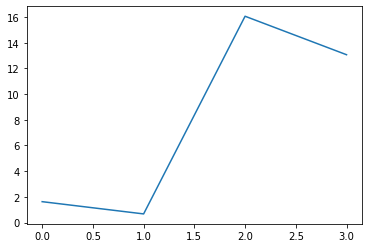

In [47]:
import matplotlib.pyplot as plt
plt.plot(f_scores)